In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [13]:
def directs(name):
    return f'../sbart_cleaning/BehData/{name}/new_Data_P2_{name}.csv'

In [14]:
def index_splits(dataframe):
    p2id = dataframe['P2ID'].values
    
    num = [0]
    for i in range(len(dataframe)-1):
        if p2id[i] != p2id[i+1]:
            num.append(i+1)
    #print(num)
    
    return num

In [15]:
def behav(x,y):
    f = (x-y)/(x+y)
    return f

In [16]:
def beh_per_game(filename):
    
    # 0) load the dataframe
    df = pd.read_csv(filename)
    df2 = df[['Participant','P2ID','Condition','PressPump','P2_PressPump']]
    df2_sub = df2[df2['Condition'] == 1]
    df2_sub = df2_sub.reset_index(drop=True)
    
    # 1) split up the dataframe by p2id where game ends
    
    idxs = index_splits(df2_sub)
    results = []
    for i in range(len(idxs)-1):
        results.append(df2.iloc[idxs[i]:idxs[i+1]])
    
    
    # 2) loop over results and cum sum
    
    cumx = []
    cumy = []

    for i in range(len(results)):
        data = results[i]
    

        p1pump = data.PressPump
        p2pump = data.P2_PressPump

        cump1 = np.cumsum(p1pump)
        cump2 = np.cumsum(p2pump)

        cumx.append(cump1.iloc[-1])
        cumy.append(cump2.iloc[-1])
        
       
        
        #print(len(cumx))
        #print(len(cumy))
    
    # 3) compute beh
    
    behs = []
    for i in range(len(cumx)):
        xval = cumx[i]
        yval = cumy[i]
        beh = behav(xval,yval)
        behs.append(beh)
    
    
    return behs

In [73]:
def beh_per_game(filename,part_arr):
    
    # 0) load the dataframe
    df = pd.read_csv(filename)
    df2 = df[['Participant','P2ID','Condition','PressPump','P2_PressPump']]
    df2_sub = df2[df2['Condition'] == 1]
    df2_sub = df2_sub.reset_index(drop=True)
    # 1) split up the dataframe by p2id where game ends
    
    idxs = index_splits(df2_sub)
    results = []
    for i in range(len(idxs)-1):
        results.append(df2_sub.iloc[idxs[i]:idxs[i+1]])
    
    
    # 2) loop over results and cum sum
    
    cumx = []
    cumy = []

    p2_arr = []
    
    for i in range(len(results)):
        data = results[i]
        
        p1 = data.Participant.values[0]
        p2 = data.P2ID.values[0]
        p2_arr.append(p2)
        
    part_arr[int(p1)] = p2_arr
        
    #return behs

In [74]:
def beh_per_game_for_all_players():
    part_arr = {}
    names = glob('../sbart_cleaning/BehData/*')
    for fname in names:
        pfname = fname[26:]
        #print(pfname)
        #assert False
        filename = directs(pfname)
        #print(filename)
        #processed = process_file(filename)
        #cum_sum(resu(p2info(process_file(filename))))
        
        beh_per_game(filename,part_arr)
        
    return part_arr
    

In [75]:
results = beh_per_game_for_all_players()

In [ ]:
results

In [ ]:
dict_results = {}

for p1id in results:
    # figure out counts
    counts = {}
    for x in results[p1id]:
        if x not in counts:
            counts[x] = 1
        else:
            counts[x] += 1
    #print(counts)
    
    dict_results[int(p1id)] = counts
    
print(dict_results)

In [77]:
# decided to append -beh 
for p1id in dict_results:
    for p2id in dict_results[p1id]:
        count = dict_results[p1id][p2id]
        
        if p2id in dict_results:
            if p1id in dict_results[p2id]:
                count2 = dict_results[p2id][p1id]
                if count != count2:
                    print(' not good')
                    print(p1id, p2id, count, count2)
#             else:
#                 print('not good')
#                 print(p1id, p2id, count)
#         else:
#             print(' notgood')
#             print(p1id, p2id, count)
        

 not good
1 22 4 5
 not good
1 2 11 8
 not good
100 102 7 8
 not good
102 100 8 7
 not good
106 109 3 2
 not good
109 106 2 3
 not good
11 49 5 4
 not good
117 5 8 7
 not good
119 122 11 12
 not good
12 4 9 1
 not good
12 9 7 6
 not good
120 125 11 13
 not good
120 124 10 9
 not good
121 122 12 13
 not good
122 121 13 12
 not good
122 119 12 11
 not good
124 120 9 10
 not good
125 120 13 11
 not good
128 130 4 3
 not good
13 4 13 12
 not good
130 128 3 4
 not good
132 135 9 8
 not good
135 132 8 9
 not good
14 4 12 8
 not good
141 142 13 14
 not good
142 141 14 13
 not good
142 145 3 4
 not good
145 142 4 3
 not good
146 147 5 4
 not good
147 149 8 7
 not good
147 146 4 5
 not good
149 147 7 8
 not good
151 155 4 3
 not good
155 151 3 4
 not good
162 163 9 8
 not good
163 162 8 9
 not good
17 2 9 6
 not good
18 2 3 2
 not good
18 20 4 5
 not good
19 20 6 5
 not good
19 2 7 2
 not good
2 20 4 6
 not good
2 18 2 3
 not good
2 17 6 9
 not good
2 1 8 11
 not good
2 19 2 7
 not good
2 22 1 

In [177]:
print(len(results))

129


In [165]:
# plot the numbers

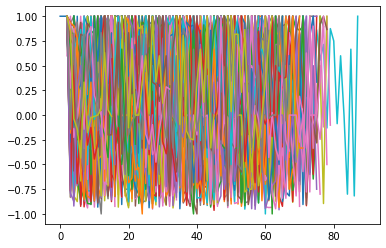

In [183]:
plt.figure()
for i in range(len(results)):
    plt.plot(results[i])

In [167]:
#histogram
histdata = []
for i in range(len(results)):
    mask = ~np.isnan(results[i])
    newr = np.array(results[i])[mask]
    histdata.append(np.mean(newr))
#print(histdata)

/home/ola/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ola/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/home/ola/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6731: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/ola/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6732: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

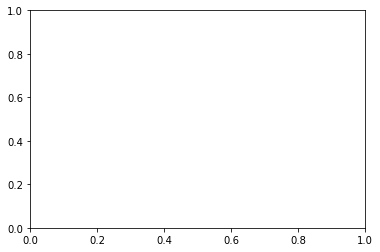

In [168]:
plt.figure()
plt.hist(histdata, bins=20)
plt.ylabel('count')
plt.xlabel('behavior')
plt.xlim(-1,1)
plt.savefig('figs/behav_hist')

[-0.0591802  -0.02470459  0.00977102  0.04424663  0.07872224  0.11319784
  0.14767345  0.18214906  0.21662467  0.25110028  0.28557589  0.3200515
  0.3545271   0.38900271  0.42347832  0.45795393  0.49242954  0.52690515
  0.56138076  0.59585636  0.63033197]
[ 3  1  3  8  9 12  8  9  9  8 14 14  5  7  6  8  2  0  1  2]


(-1.0, 1.0)

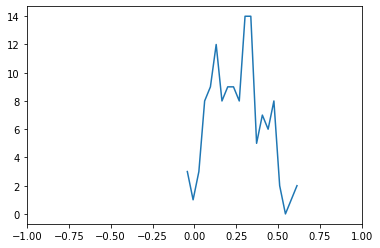

In [101]:
freqs, bins = np.histogram(histdata, bins=20)

print(bins)
print(freqs)

bin_centers = (bins[1:] + bins[:-1]) / 2

plt.figure()
plt.plot(bin_centers, freqs, '-')
plt.xlim(-1, 1)

In [82]:
mask = ~np.isnan(results[0])
print(mask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True False  True  True  True  True
  True  True  True  True  True  True  True  True False  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True]


In [113]:
# shifting histogram
newr = []
for i in range(len(results)):
    mask = ~np.isnan(results[i])
    newr.append(np.array(results[i])[mask])

129


In [127]:
first = []
second = []
third = []
for i in range(len(newr)):
    first.append(np.mean(newr[i][0:20]))
    second.append(np.mean(newr[i][20:40]))
    if len(newr[i])>40:
        third.append(np.mean(newr[i][40:60]))

[-4.88947368e-02 -2.11711641e-04  4.84713136e-02  9.71543388e-02
  1.45837364e-01  1.94520389e-01  2.43203414e-01  2.91886440e-01
  3.40569465e-01  3.89252490e-01  4.37935515e-01  4.86618540e-01
  5.35301566e-01  5.83984591e-01  6.32667616e-01]
[ 3  4  4 11 11  5 17 13 16 11 14 13  5  2]


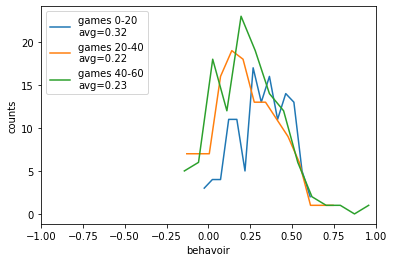

In [143]:
freqs, bins = np.histogram(first, bins=14)
freqs2, bins2 = np.histogram(second, bins=14)
freqs3, bins3 = np.histogram(third, bins=14)

print(bins)
print(freqs)

bin_centers = (bins[1:] + bins[:-1]) / 2
bin_centers2 = (bins2[1:] + bins2[:-1]) / 2 
bin_centers3 = (bins3[1:] + bins3[:-1]) / 2
plt.figure()
plt.plot(bin_centers, freqs, '-')
plt.plot(bin_centers2, freqs2, '-')
plt.plot(bin_centers3, freqs3, '-')
plt.legend([f'games 0-20\navg={np.mean(np.mean(first)):.2f}',
            f'games 20-40\navg={np.mean(np.mean(second)):.2f}',
            f'games 40-60\navg={np.mean(np.mean(third)):.2f}'], loc=2)
plt.xlim(-1, 1)
plt.xlabel('behavoir')
plt.ylabel('counts')
plt.savefig('figs/beh_over_time')

(array([ 3.,  2.,  8., 10., 13.,  7., 18., 16., 12.,  8., 10.,  4.,  4.,
         2.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([-0.1857366 , -0.12644977, -0.06716294, -0.00787611,  0.05141072,
         0.11069755,  0.16998438,  0.22927121,  0.28855804,  0.34784487,
         0.4071317 ,  0.46641853,  0.52570536,  0.58499219,  0.64427902,
         0.70356585,  0.76285268,  0.82213951,  0.88142634,  0.94071317,
         1.        ]),
 <BarContainer object of 20 artists>)

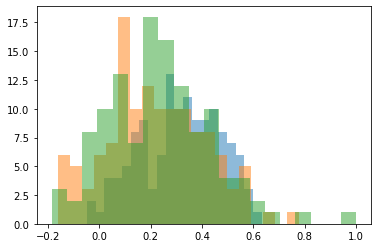

In [129]:
plt.figure()
plt.hist(first, bins=20, alpha=0.5)
plt.hist(second, bins=20, alpha=0.5)
plt.hist(third, bins=20, alpha=0.5)

In [ ]:
# which participant is computer??
